In [1]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

In [2]:
# 한글폰트 사용 
import matplotlib.pyplot as plt

plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings(action='ignore')

In [4]:
# 데이터불러오기
df = pd.read_csv('D:/MultiCampus/00.Project/001/project_01/data/train_메뉴제외.csv')
df.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,식사가능인원,...,석식결식,중식강수여부,중식기온,중식강수량,석식강수여부,석식기온,석식강수량,확진자수,휴일전날,휴일다음날
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2401.0,...,2070.0,0.0,3.0,0.0,0.0,0.9,0.0,0.0,0,1
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2378.0,...,1818.0,0.0,1.7,0.0,0.0,2.4,0.0,0.0,0,0
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2365.0,...,1792.0,0.0,3.2,0.0,0.0,3.0,0.0,0.0,0,0
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,2277.0,...,1752.0,0.0,3.7,0.0,0.0,4.0,0.0,0.0,0,0
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2142.0,...,1812.0,0.0,6.3,0.0,0.0,5.7,0.0,0.0,1,0


In [5]:
# info() 데이터 각 특징값(컬럼, 필드) 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   중식계             1205 non-null   float64
 8   석식계             1205 non-null   float64
 9   식사가능인원          1205 non-null   float64
 10  중식결식            1205 non-null   float64
 11  석식결식            1205 non-null   float64
 12  중식강수여부          1205 non-null   float64
 13  중식기온            1205 non-null   float64
 14  중식강수량           1205 non-null   float64
 15  석식강수여부          1205 non-null   float64
 16  석식기온            1205 non-null   float64
 17  석식강수량           1205 non-null   f

In [6]:
# 기술통계를 통해서 데이터의 분포도 확인 
df.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,식사가능인원,중식결식,석식결식,중식강수여부,중식기온,중식강수량,석식강수여부,석식기온,석식강수량,확진자수,휴일전날,휴일다음날
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614,2365.253112,1474.918672,1903.480498,0.084647,17.604398,0.253361,0.073859,16.500083,0.208382,37.873029,0.232365,0.233195
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202,176.563062,232.052134,205.118491,0.278472,9.164848,1.490139,0.261650,9.185185,1.394587,133.657704,0.422516,0.423041
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000,1372.000000,893.000000,1110.000000,0.000000,-5.400000,0.000000,0.000000,-7.500000,0.000000,0.000000,0.000000,0.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000,2281.000000,1321.000000,1777.000000,0.000000,9.700000,0.000000,0.000000,8.800000,0.000000,0.000000,0.000000,0.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000,2357.000000,1471.000000,1867.000000,0.000000,18.100000,0.000000,0.000000,16.900000,0.000000,0.000000,0.000000,0.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000,2461.000000,1630.000000,2017.000000,0.000000,25.500000,0.000000,0.000000,24.300000,0.000000,0.000000,0.000000,0.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000,2921.000000,2172.000000,2908.000000,1.000000,35.300000,28.100000,1.000000,34.600000,21.000000,1090.000000,1.000000,1.000000


In [7]:
# 필요한 데이터 추출 
df = df[['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '중식계', '석식계', '식사가능인원', '중식결식', '석식결식', '휴일전날','휴일다음날']]
df.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,식사가능인원,중식결식,석식결식,휴일전날,휴일다음날
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2401.0,1362.0,2070.0,0,1
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2378.0,1511.0,1818.0,0,0
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2365.0,1348.0,1792.0,0,0
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,2277.0,1299.0,1752.0,0,0
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2142.0,1217.0,1812.0,1,0


In [8]:
# 컬럼명 변경 
df.columns = ['일자', '요일', '정원', '휴가', '출장', '야근', '재택', '중식계', '석식계', '식사가능대상', '중결식', '석결식','휴일전', '휴일후']

In [9]:
# 일자, 요일 라벨링(숫자형으로 변환)
df['연도'] =  pd.DatetimeIndex(df['일자']).year
df['월'] = pd.DatetimeIndex(df['일자']).month
df['일'] = pd.DatetimeIndex(df['일자']).day

# weekday = {
#     '월': 1,
#     '화': 2,
#     '수': 3,
#     '목': 4,
#     '금': 5
# }

# train['요일'] = train['요일'].map(weekday)

In [10]:
df

,일자,요일,정원,휴가,출장,야근,재택,중식계,석식계,식사가능대상,중결식,석결식,휴일전,휴일후,연도,월,일
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2401.0,1362.0,2070.0,0,1,2016,2,1
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2378.0,1511.0,1818.0,0,0,2016,2,2
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2365.0,1348.0,1792.0,0,0,2016,2,3
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,2277.0,1299.0,1752.0,0,0,2016,2,4
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2142.0,1217.0,1812.0,1,0,2016,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,1093.0,421.0,2319.0,1226.0,1898.0,0,0,2021,1,20
1201,2021-01-21,목,2983,92,231,462,351.0,832.0,353.0,2309.0,1477.0,1956.0,0,0,2021,1,21
1202,2021-01-22,금,2983,255,248,1,303.0,579.0,217.0,2177.0,1598.0,1960.0,1,0,2021,1,22
1203,2021-01-25,월,2983,107,153,616,327.0,1145.0,502.0,2396.0,1251.0,1894.0,0,1,2021,1,25


In [11]:
df['중식참여율'] = df['중식계'] / df['식사가능대상']
df['석식참여율'] = df['석식계'] / df['식사가능대상']

In [12]:
df.head()

,일자,요일,정원,휴가,출장,야근,재택,중식계,석식계,식사가능대상,중결식,석결식,휴일전,휴일후,연도,월,일,중식참여율,석식참여율
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2401.0,1362.0,2070.0,0,1,2016,2,1,0.432736,0.137859
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2378.0,1511.0,1818.0,0,0,2016,2,2,0.364592,0.235492
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2365.0,1348.0,1792.0,0,0,2016,2,3,0.430021,0.242283
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,2277.0,1299.0,1752.0,0,0,2016,2,4,0.429513,0.230567
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2142.0,1217.0,1812.0,1,0,2016,2,5,0.431839,0.154062


In [13]:
# null 값 확인 
df.isnull() 

# null값 0으로 
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      1205 non-null   object 
 1   요일      1205 non-null   object 
 2   정원      1205 non-null   int64  
 3   휴가      1205 non-null   int64  
 4   출장      1205 non-null   int64  
 5   야근      1205 non-null   int64  
 6   재택      1205 non-null   float64
 7   중식계     1205 non-null   float64
 8   석식계     1205 non-null   float64
 9   식사가능대상  1205 non-null   float64
 10  중결식     1205 non-null   float64
 11  석결식     1205 non-null   float64
 12  휴일전     1205 non-null   int64  
 13  휴일후     1205 non-null   int64  
 14  연도      1205 non-null   int64  
 15  월       1205 non-null   int64  
 16  일       1205 non-null   int64  
 17  중식참여율   1205 non-null   float64
 18  석식참여율   1205 non-null   float64
dtypes: float64(8), int64(9), object(2)
memory usage: 179.0+ KB


In [14]:
# 상관도 - 히트맵 
df.corr()[['중식계', '석식계']]

,중식계,석식계
정원,-0.115529,-0.173852
휴가,-0.391975,-0.316894
출장,-0.512680,-0.188164
야근,0.535611,0.571168
재택,0.076509,-0.057534
중식계,1.000000,0.508287
석식계,0.508287,1.000000
식사가능대상,0.286810,0.172373
중결식,-0.684609,-0.327745
석결식,-0.098006,-0.530154


<AxesSubplot:>

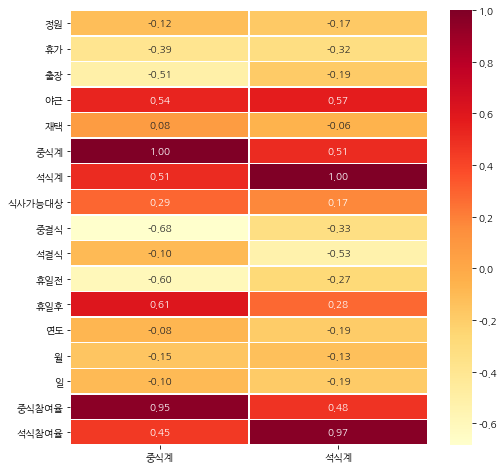

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(data =df.corr()[['중식계', '석식계']], annot=True, fmt = '.2f', linewidths=.5, cmap='YlOrRd')

In [16]:
df.columns

Index(['일자', '요일', '정원', '휴가', '출장', '야근', '재택', '중식계', '석식계', '식사가능대상', '중결식',
       '석결식', '휴일전', '휴일후', '연도', '월', '일', '중식참여율', '석식참여율'],
      dtype='object')

<AxesSubplot:xlabel='요일', ylabel='석식참여율'>

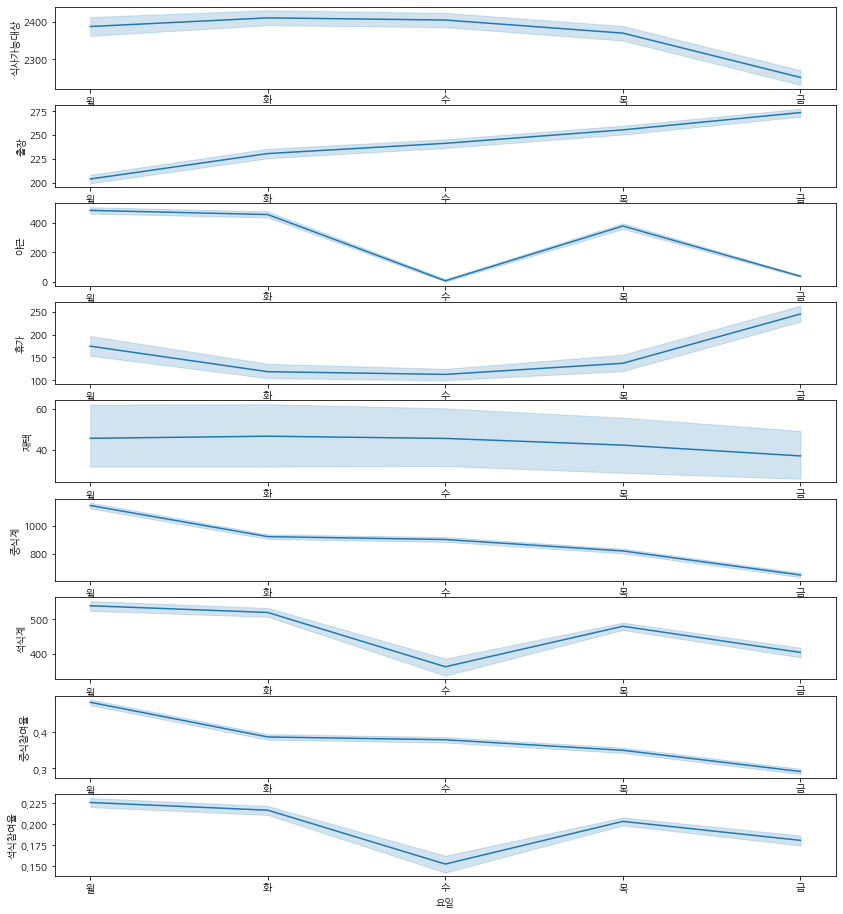

In [17]:
## 요일 - 라인그래프 
fig, ax = plt.subplots(9)
fig.set_size_inches(14,16)

sns.lineplot(data=df, x='요일', y='식사가능대상', ax=ax[0])
sns.lineplot(data=df, x='요일', y='출장', ax=ax[1])
sns.lineplot(data=df, x='요일', y='야근', ax=ax[2])
sns.lineplot(data=df, x='요일', y='휴가', ax=ax[3])
sns.lineplot(data=df, x='요일', y='재택', ax=ax[4])
sns.lineplot(data=df, x='요일', y='중식계', ax=ax[5])
sns.lineplot(data=df, x='요일', y='석식계', ax=ax[6])
sns.lineplot(data=df, x='요일', y='중식참여율', ax=ax[7])
sns.lineplot(data=df, x='요일', y='석식참여율', ax=ax[8])

<AxesSubplot:xlabel='월', ylabel='석식참여율'>

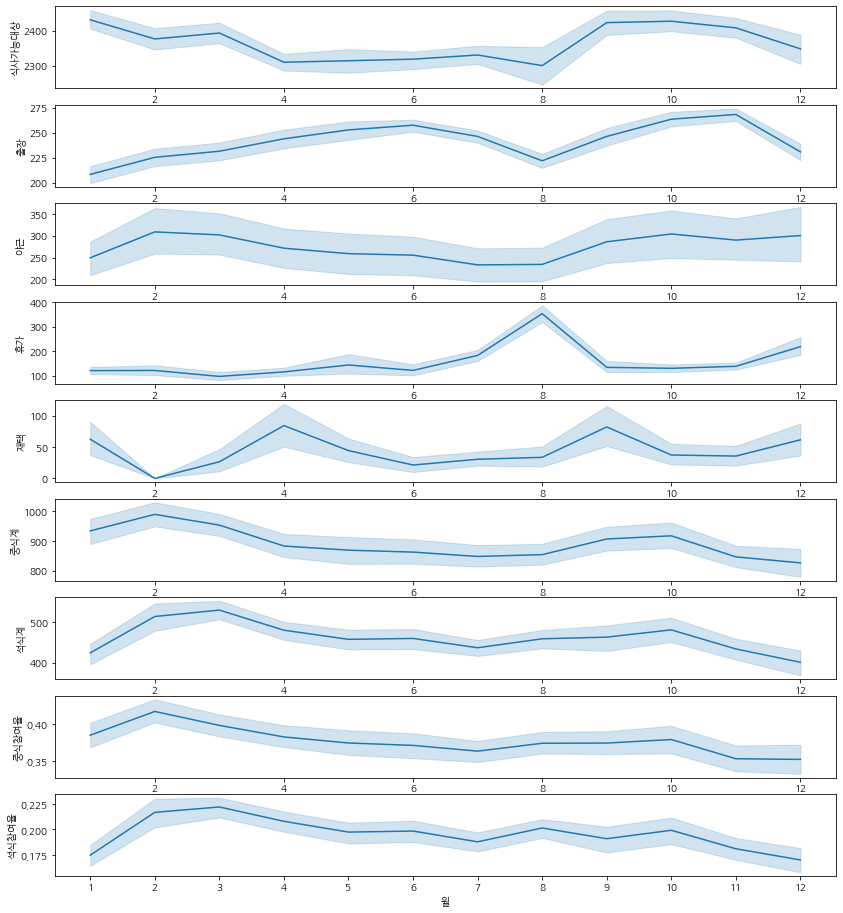

In [18]:
## 월별 - 라인그래프 
fig, ax = plt.subplots(9)
fig.set_size_inches(14,16)
plt.xticks(np.arange(0,13))

sns.lineplot(data=df, x='월', y='식사가능대상', ax=ax[0])
sns.lineplot(data=df, x='월', y='출장', ax=ax[1])
sns.lineplot(data=df, x='월', y='야근', ax=ax[2])
sns.lineplot(data=df, x='월', y='휴가', ax=ax[3])
sns.lineplot(data=df, x='월', y='재택', ax=ax[4])
sns.lineplot(data=df, x='월', y='중식계', ax=ax[5])
sns.lineplot(data=df, x='월', y='석식계', ax=ax[6])
sns.lineplot(data=df, x='월', y='중식참여율', ax=ax[7])
sns.lineplot(data=df, x='월', y='석식참여율', ax=ax[8])


<AxesSubplot:xlabel='연도', ylabel='석식참여율'>

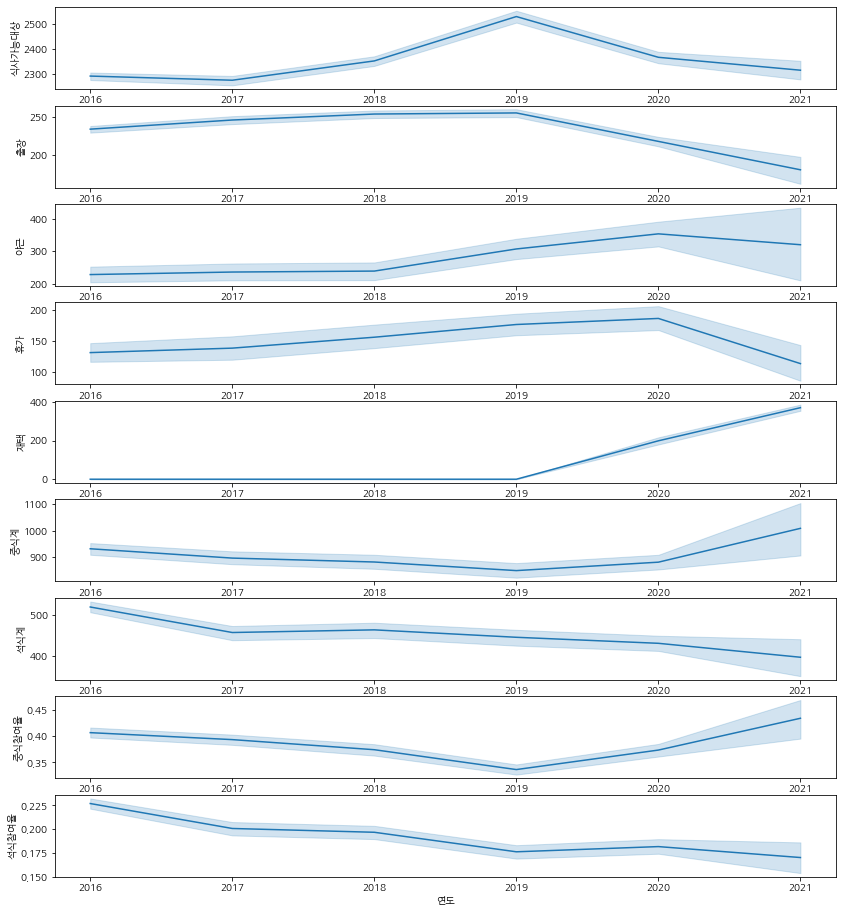

In [19]:
## 연도별 - 라인그래프 
fig, ax = plt.subplots(9)
fig.set_size_inches(14,16)

sns.lineplot(data=df, x='연도', y='식사가능대상', ax=ax[0])
sns.lineplot(data=df, x='연도', y='출장', ax=ax[1])
sns.lineplot(data=df, x='연도', y='야근', ax=ax[2])
sns.lineplot(data=df, x='연도', y='휴가', ax=ax[3])
sns.lineplot(data=df, x='연도', y='재택', ax=ax[4])
sns.lineplot(data=df, x='연도', y='중식계', ax=ax[5])
sns.lineplot(data=df, x='연도', y='석식계', ax=ax[6])
sns.lineplot(data=df, x='연도', y='중식참여율', ax=ax[7])
sns.lineplot(data=df, x='연도', y='석식참여율', ax=ax[8])

------------정원별 중식계-----------------


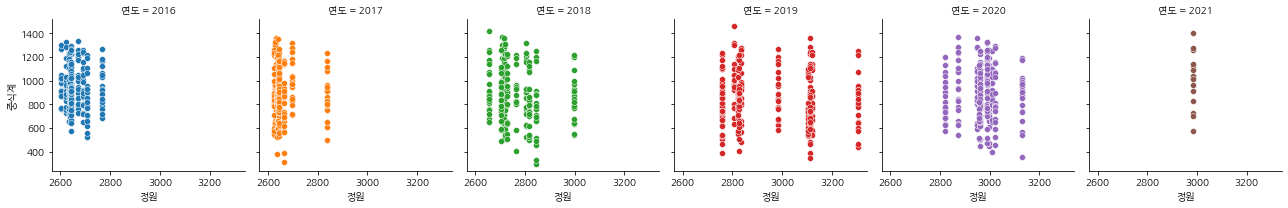

------------식사가능대상별 중식계-----------------


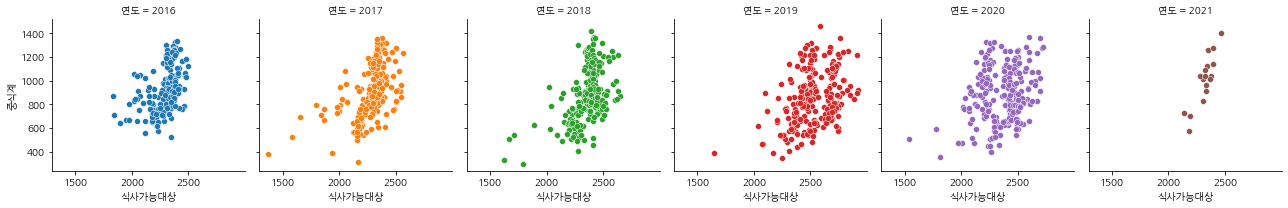

------------출장별 중식계-----------------


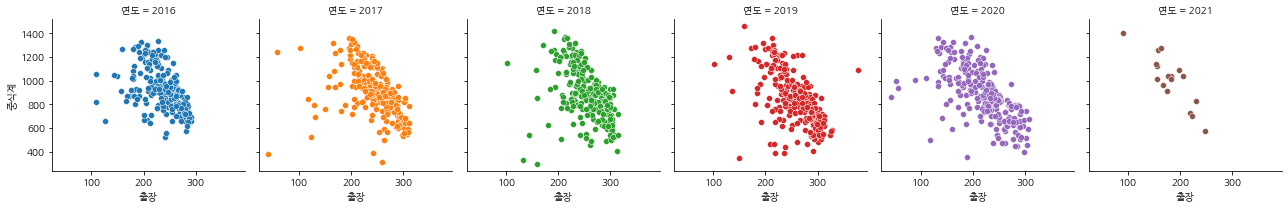

------------야근별 중식계-----------------


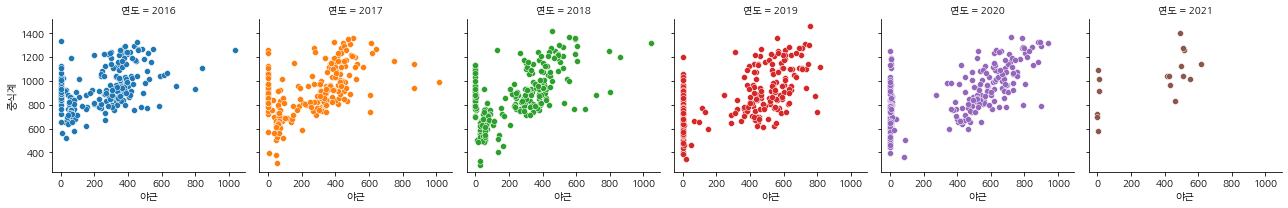

------------휴가별 중식계-----------------


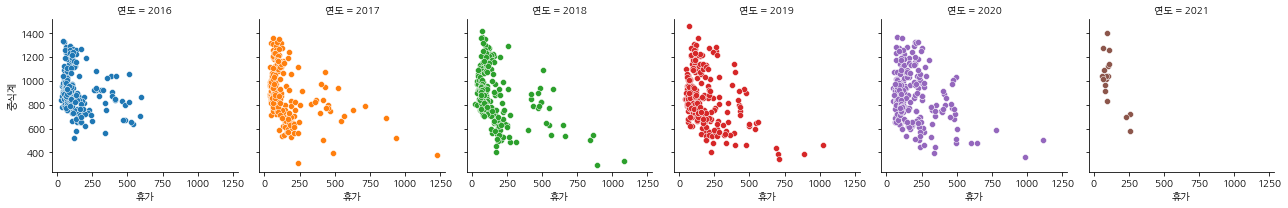

------------재택별 중식계-----------------


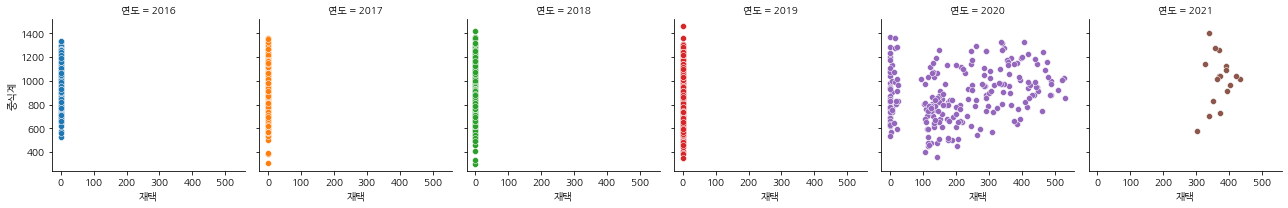

------------중식참여율별 중식계-----------------


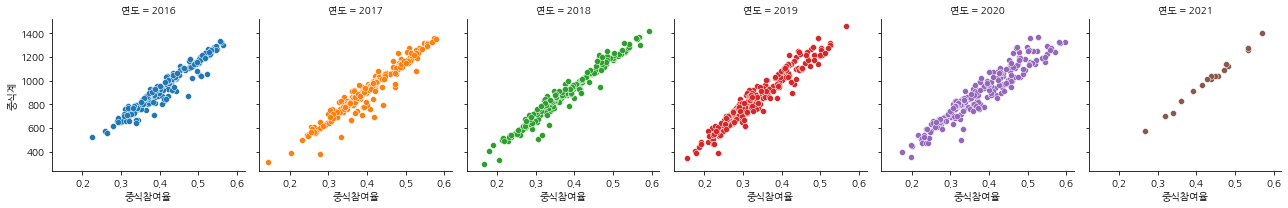

------------석식참여율별 중식계-----------------


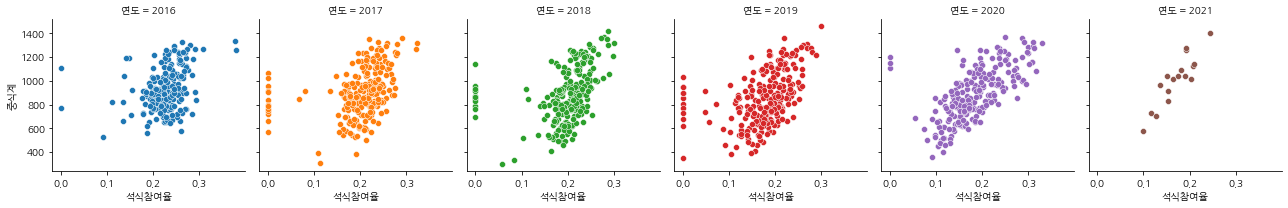

In [20]:
# 연도별 산점도  
fig.set_size_inches(14,16)
for column in df[['정원', '식사가능대상', '출장', '야근', '휴가', '재택', '중식참여율', '석식참여율']]:
    print(f'------------{column}별 중식계-----------------')
    grid = sns.FacetGrid(data=df, col='연도', hue='연도')
    grid.map(sns.scatterplot, column, '중식계')
    plt.show()


------------정원별 중식계-----------------


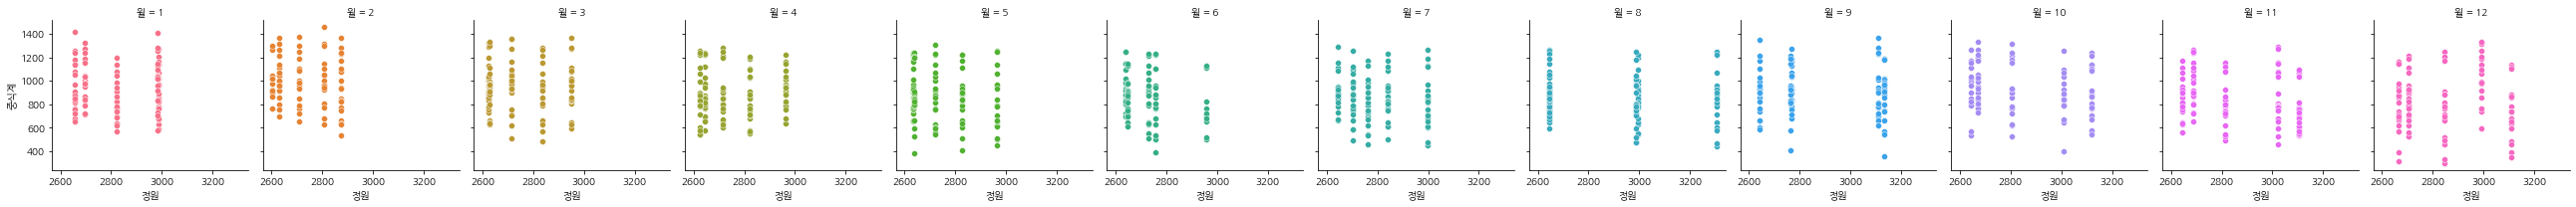

------------식사가능대상별 중식계-----------------


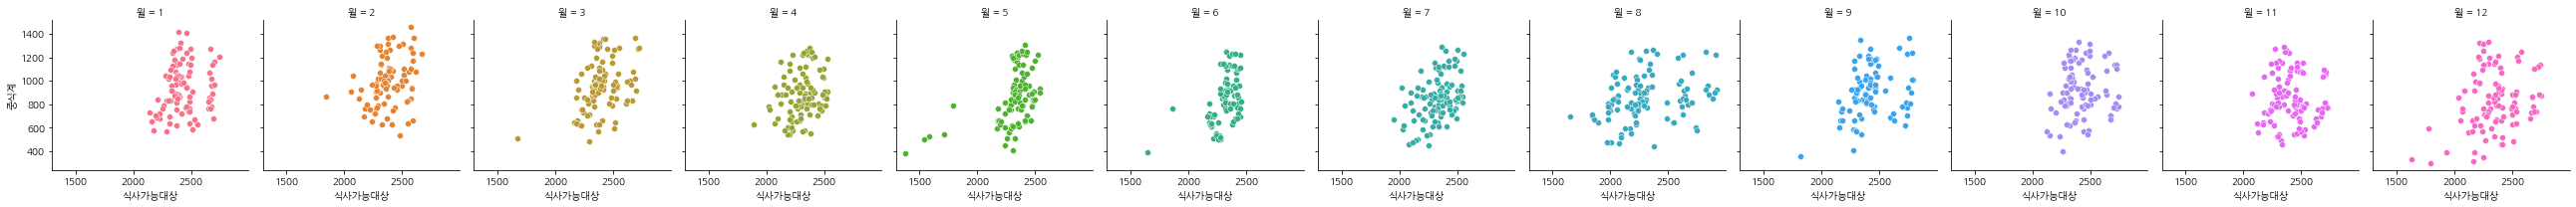

------------출장별 중식계-----------------


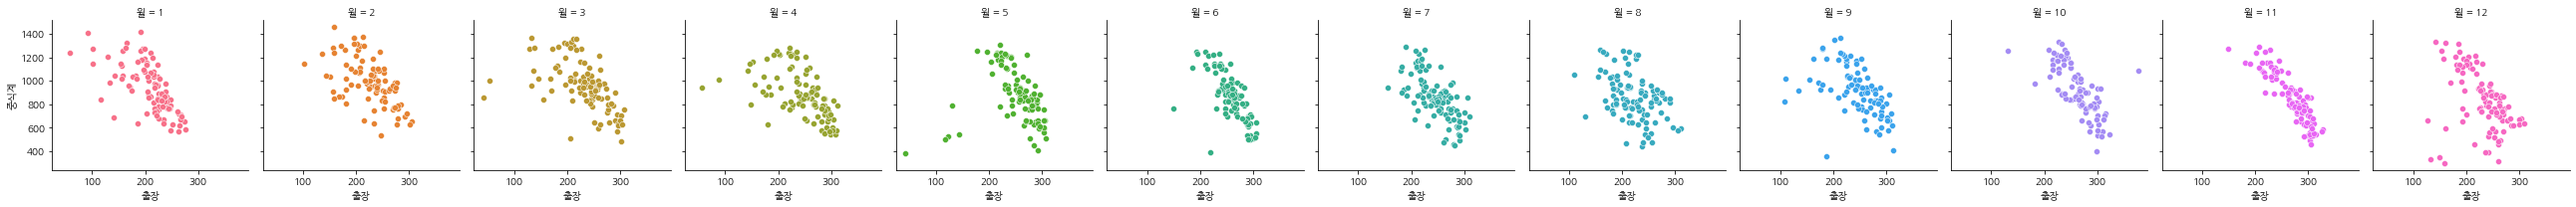

------------야근별 중식계-----------------


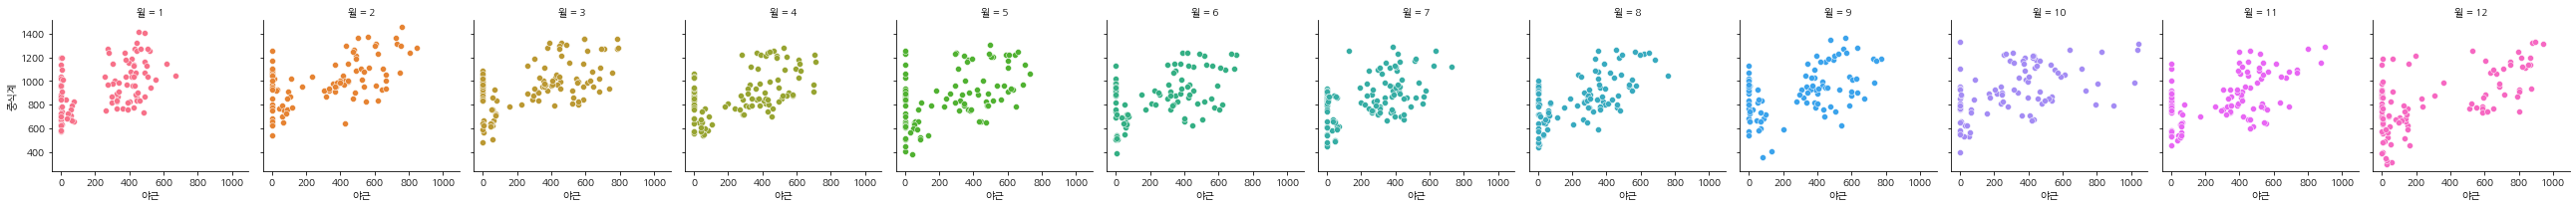

------------휴가별 중식계-----------------


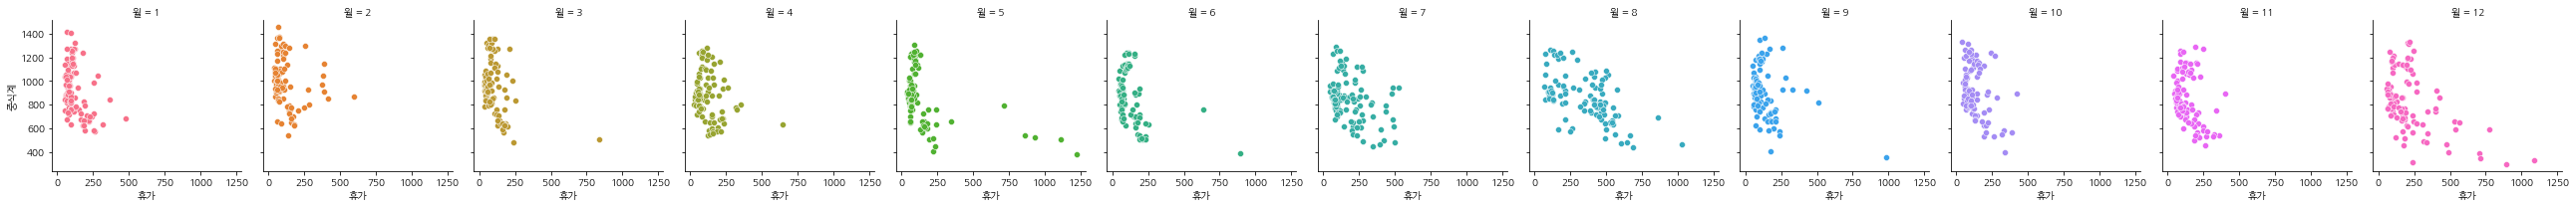

------------재택별 중식계-----------------


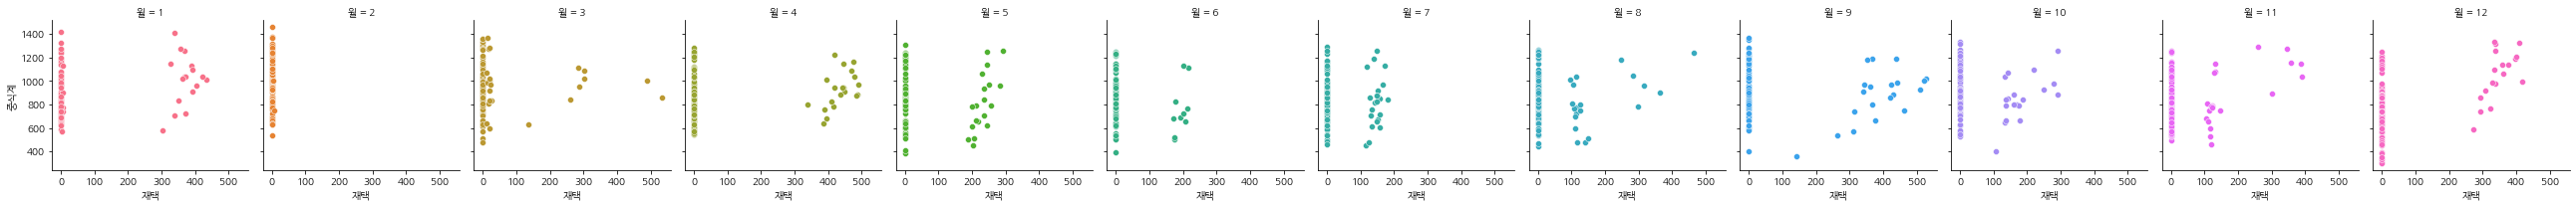

------------중식참여율별 중식계-----------------


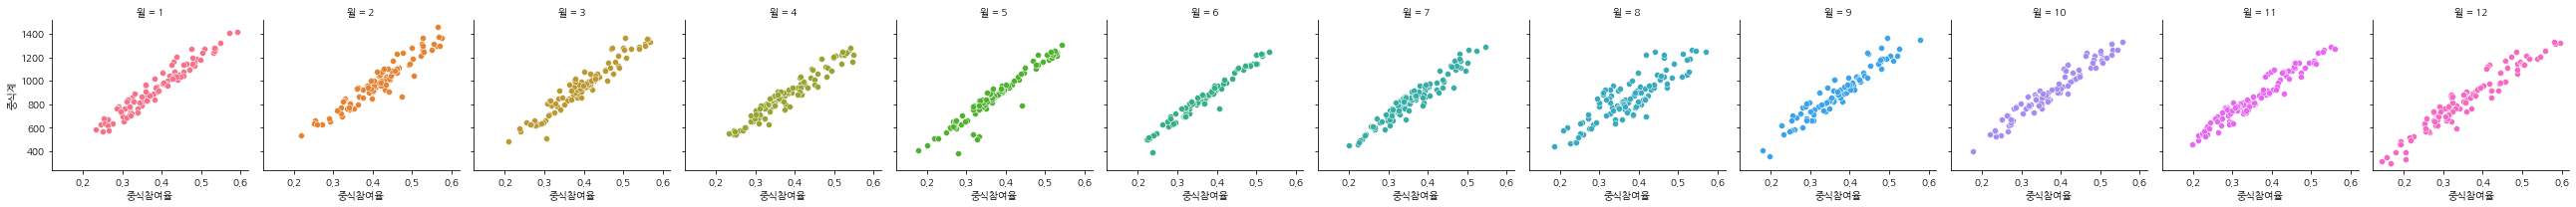

------------석식참여율별 중식계-----------------


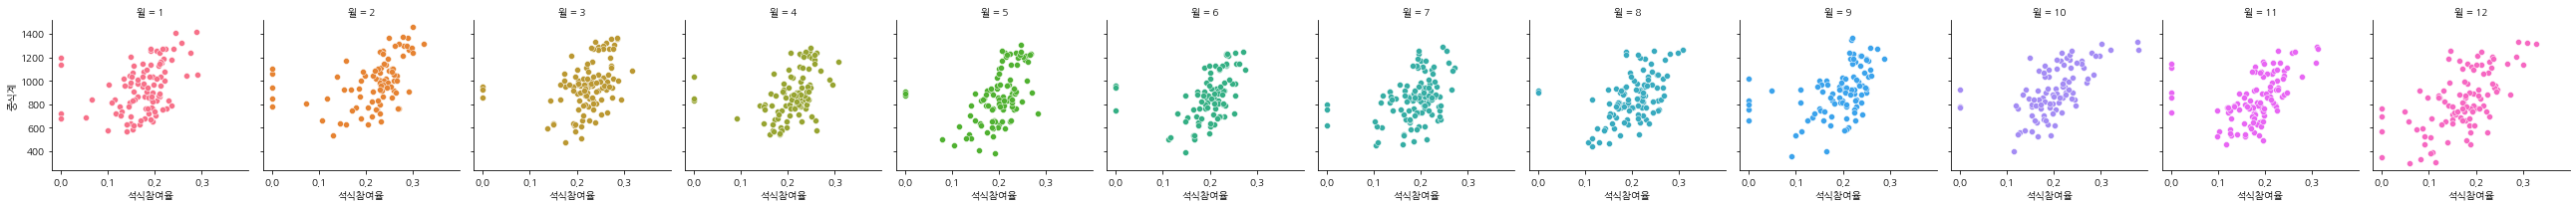

In [75]:
# 월별 그래프 
fig.set_size_inches(18,20)
for column in df[['정원', '식사가능대상', '출장', '야근', '휴가', '재택', '중식참여율', '석식참여율']]:
    print(f'------------{column}별 중식계-----------------')
    grid = sns.FacetGrid(data=df, col='월', hue='월')
    grid.map(sns.scatterplot, column, '중식계')
    plt.show()

------------정원별 중식계-----------------


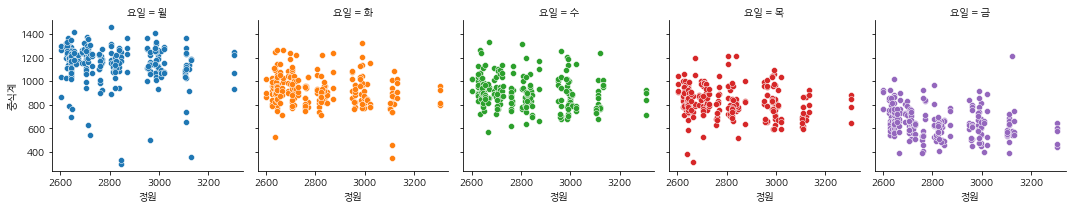

------------식사가능대상별 중식계-----------------


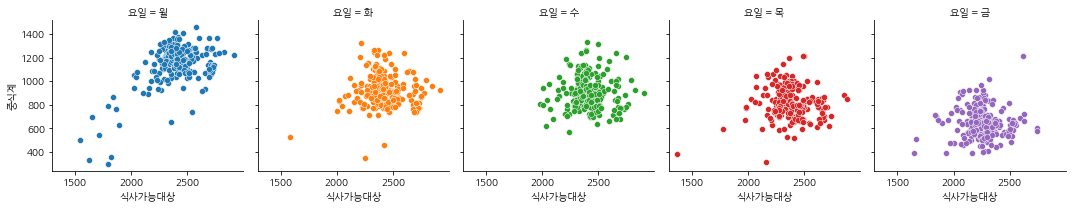

------------출장별 중식계-----------------


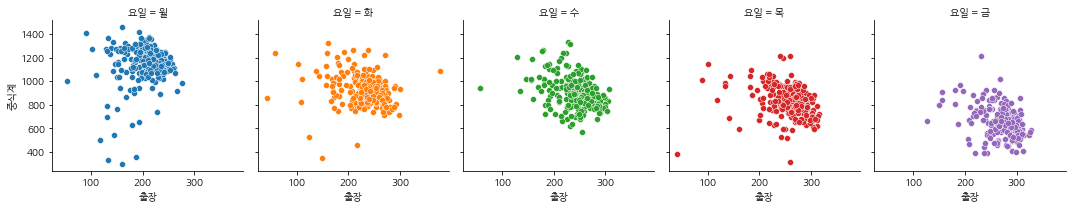

------------야근별 중식계-----------------


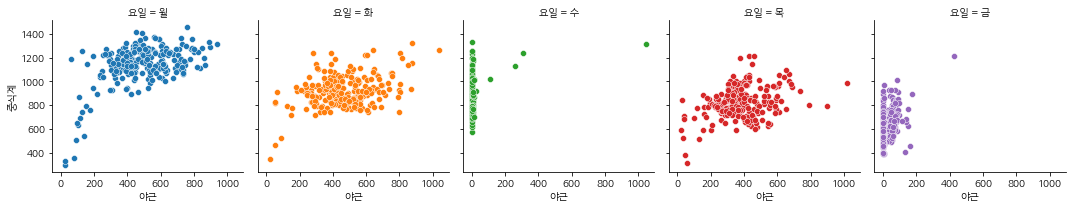

------------휴가별 중식계-----------------


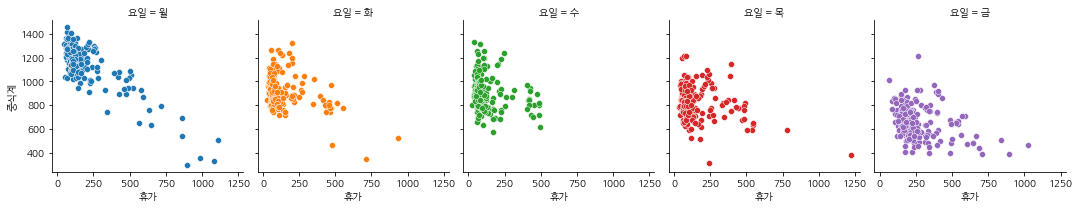

------------재택별 중식계-----------------


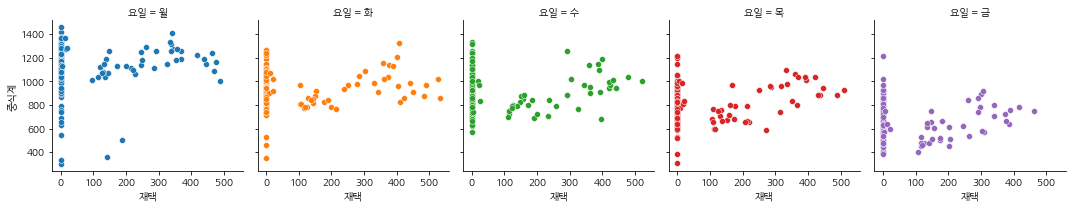

------------중식참여율별 중식계-----------------


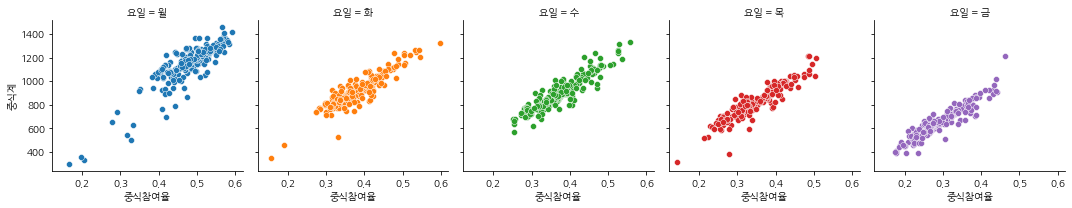

------------석식참여율별 중식계-----------------


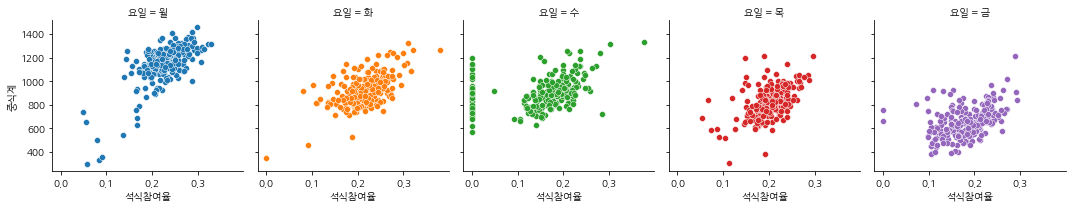

In [22]:
# 요일별 그래프 
fig.set_size_inches(14,16)
for column in df[['정원', '식사가능대상', '출장', '야근', '휴가', '재택', '중식참여율', '석식참여율']]:
    print(f'------------{column}별 중식계-----------------')
    grid = sns.FacetGrid(data=df, col='요일', hue='요일')
    grid.map(sns.scatterplot, column, '중식계')
    plt.show()

In [ ]:
# ## 요일, 월별 그래프 by나영님
# tmp_ln = df.groupby(['월', '요일'])['중식계'].mean().reset_index().pivot('월', '요일', '중식계')
# tmp_dn = df.groupby(['월', '요일'])['석식계'].mean().reset_index().pivot('월', '요일', '석식계')

# fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))

# sns.heatmap(tmp_ln, cmap='RdYlGn_r', ax=ax[0])
# ax[0].set_title('Lunch', pad = 12)
# sns.heatmap(tmp_dn, cmap='RdYlGn_r', ax=ax[1])
# ax[1].set_title('Dinner', pad = 12)

# plt.show()

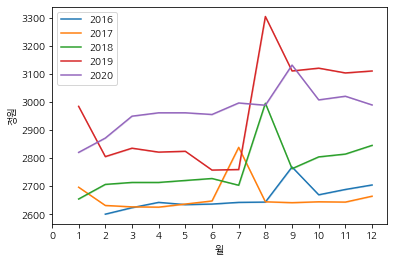

In [23]:
# 2019년도에 왜 이렇게? -> 2019년도 상반기 한국토지주택공사 신입직원(채용형 인턴): 500명 채용 - 4월 접수, 6월 최종합격, 7월 임용
# 2019, 2020년도 비교 
year = [2016, 2017, ]
sns.lineplot(data=df[(df['연도']==2016)], x='월', y='정원', label='2016')
sns.lineplot(data=df[(df['연도']==2017)], x='월', y='정원', label='2017')
sns.lineplot(data=df[(df['연도']==2018)], x='월', y='정원', label='2018')
sns.lineplot(data=df[(df['연도']==2019)], x='월', y='정원', label='2019')
sns.lineplot(data=df[(df['연도']==2020)], x='월', y='정원', label='2020')
plt.xticks(np.arange(0,13))
plt.show()

In [93]:
df['연월'] = df['연도'].map(str)+""+df['월'].map(str)
df['연월'] = df['연월'].astype('int64')
df.head()

,일자,요일,정원,휴가,출장,야근,재택,중식계,석식계,식사가능대상,...,석결식,휴일전,휴일후,연도,월,일,중식참여율,석식참여율,요일2,연월
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2401.0,...,2070.0,0,1,2016,2,1,0.432736,0.137859,1,20162
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2378.0,...,1818.0,0,0,2016,2,2,0.364592,0.235492,2,20162
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2365.0,...,1792.0,0,0,2016,2,3,0.430021,0.242283,3,20162
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,2277.0,...,1752.0,0,0,2016,2,4,0.429513,0.230567,4,20162
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2142.0,...,1812.0,1,0,2016,2,5,0.431839,0.154062,5,20162


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      1205 non-null   object 
 1   요일      1205 non-null   object 
 2   정원      1205 non-null   int64  
 3   휴가      1205 non-null   int64  
 4   출장      1205 non-null   int64  
 5   야근      1205 non-null   int64  
 6   재택      1205 non-null   float64
 7   중식계     1205 non-null   float64
 8   석식계     1205 non-null   float64
 9   식사가능대상  1205 non-null   float64
 10  중결식     1205 non-null   float64
 11  석결식     1205 non-null   float64
 12  휴일전     1205 non-null   int64  
 13  휴일후     1205 non-null   int64  
 14  연도      1205 non-null   int64  
 15  월       1205 non-null   int64  
 16  일       1205 non-null   int64  
 17  중식참여율   1205 non-null   float64
 18  석식참여율   1205 non-null   float64
 19  요일2     1205 non-null   int64  
 20  연월      1205 non-null   int64  
dtypes: float64(8), int64(11), object(2)
m

[Text(0, 0, '20162'),
 Text(1, 0, '20163'),
 Text(2, 0, '20164'),
 Text(3, 0, '20165'),
 Text(4, 0, '20166'),
 Text(5, 0, '20167'),
 Text(6, 0, '20168'),
 Text(7, 0, '20169'),
 Text(8, 0, '20171'),
 Text(9, 0, '20172'),
 Text(10, 0, '20173'),
 Text(11, 0, '20174'),
 Text(12, 0, '20175'),
 Text(13, 0, '20176'),
 Text(14, 0, '20177'),
 Text(15, 0, '20178'),
 Text(16, 0, '20179'),
 Text(17, 0, '20181'),
 Text(18, 0, '20182'),
 Text(19, 0, '20183'),
 Text(20, 0, '20184'),
 Text(21, 0, '20185'),
 Text(22, 0, '20186'),
 Text(23, 0, '20187'),
 Text(24, 0, '20188'),
 Text(25, 0, '20189'),
 Text(26, 0, '20191'),
 Text(27, 0, '20192'),
 Text(28, 0, '20193'),
 Text(29, 0, '20194'),
 Text(30, 0, '20195'),
 Text(31, 0, '20196'),
 Text(32, 0, '20197'),
 Text(33, 0, '20198'),
 Text(34, 0, '20199'),
 Text(35, 0, '20201'),
 Text(36, 0, '20202'),
 Text(37, 0, '20203'),
 Text(38, 0, '20204'),
 Text(39, 0, '20205'),
 Text(40, 0, '20206'),
 Text(41, 0, '20207'),
 Text(42, 0, '20208'),
 Text(43, 0, '20209')

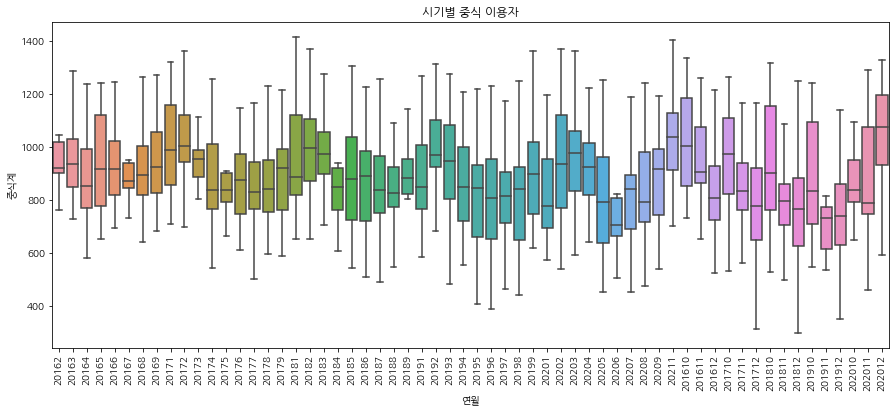

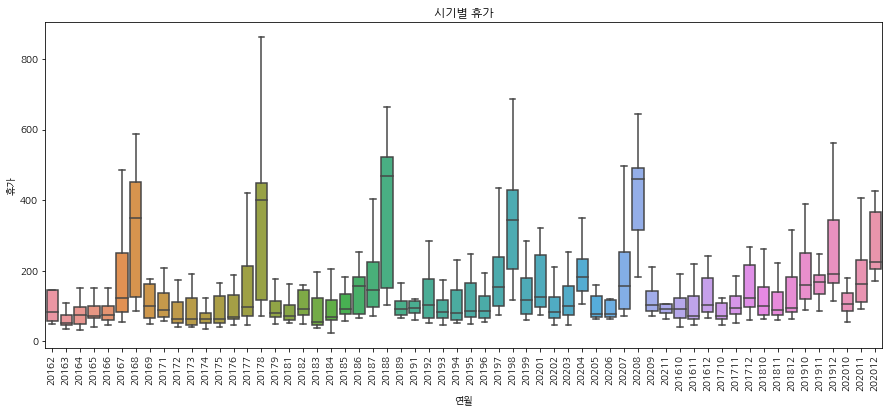

In [123]:
plt.figure(figsize=(15,6))
plt.subplot()
yemo = sns.boxplot(x='연월', y='중식계', data=df, showfliers=False)
yemo.set_title('시기별 중식 이용자')
yemo.set_xticklabels(yemo.get_xticklabels(), rotation=90)

plt.figure(figsize=(15,6))
plt.subplot()
yemo_vc = sns.boxplot(x='연월', y='휴가', data=df, showfliers=False)
yemo_vc.set_title('시기별 휴가')
yemo_vc.set_xticklabels(yemo.get_xticklabels(), rotation=90)

[Text(0, 0, '20162'),
 Text(1, 0, '20163'),
 Text(2, 0, '20164'),
 Text(3, 0, '20165'),
 Text(4, 0, '20166'),
 Text(5, 0, '20167'),
 Text(6, 0, '20168'),
 Text(7, 0, '20169'),
 Text(8, 0, '20171'),
 Text(9, 0, '20172'),
 Text(10, 0, '20173'),
 Text(11, 0, '20174'),
 Text(12, 0, '20175'),
 Text(13, 0, '20176'),
 Text(14, 0, '20177'),
 Text(15, 0, '20178'),
 Text(16, 0, '20179'),
 Text(17, 0, '20181'),
 Text(18, 0, '20182'),
 Text(19, 0, '20183'),
 Text(20, 0, '20184'),
 Text(21, 0, '20185'),
 Text(22, 0, '20186'),
 Text(23, 0, '20187'),
 Text(24, 0, '20188'),
 Text(25, 0, '20189'),
 Text(26, 0, '20191'),
 Text(27, 0, '20192'),
 Text(28, 0, '20193'),
 Text(29, 0, '20194'),
 Text(30, 0, '20195'),
 Text(31, 0, '20196'),
 Text(32, 0, '20197'),
 Text(33, 0, '20198'),
 Text(34, 0, '20199'),
 Text(35, 0, '20201'),
 Text(36, 0, '20202'),
 Text(37, 0, '20203'),
 Text(38, 0, '20204'),
 Text(39, 0, '20205'),
 Text(40, 0, '20206'),
 Text(41, 0, '20207'),
 Text(42, 0, '20208'),
 Text(43, 0, '20209')

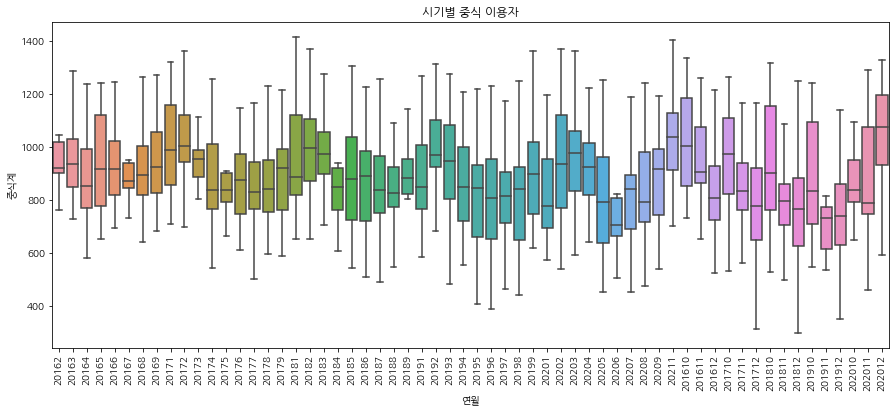

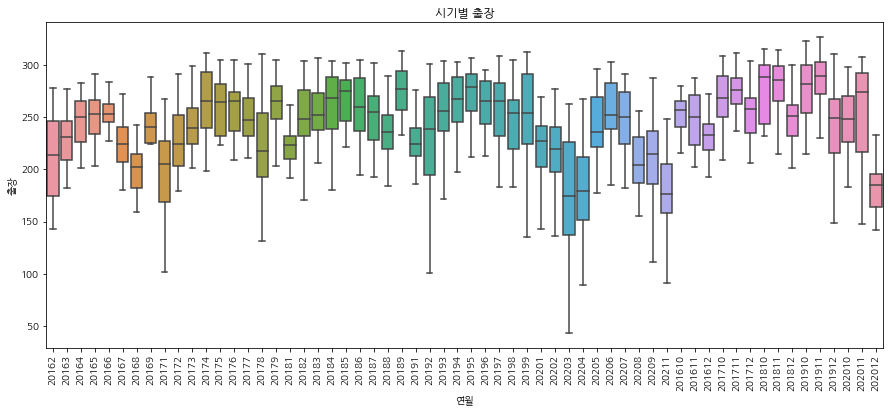

In [124]:
plt.figure(figsize=(15,6))
plt.subplot()
yemo = sns.boxplot(x='연월', y='중식계', data=df, showfliers=False)
yemo.set_title('시기별 중식 이용자')
yemo.set_xticklabels(yemo.get_xticklabels(), rotation=90)

plt.figure(figsize=(15,6))
plt.subplot()
yemo_out = sns.boxplot(x='연월', y='출장', data=df, showfliers=False)
yemo_out.set_title('시기별 출장')
yemo_out.set_xticklabels(yemo.get_xticklabels(), rotation=90)

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot()
yemo = sns.boxplot(x='연월', y='중식계', data=df, showfliers=False)
yemo.set_title('시기별 중식 이용자')
yemo.set_xticklabels(yemo.get_xticklabels(), rotation=90)

plt.figure(figsize=(15,6))
plt.subplot()
yemo_vc = sns.boxplot(x='연월', y='휴가', data=df, showfliers=False)
yemo_vc.set_title('시기별 휴가')
yemo_vc.set_xticklabels(yemo.get_xticklabels(), rotation=90)

In [101]:
df.describe()

,정원,휴가,출장,야근,재택,중식계,석식계,식사가능대상,중결식,석결식,휴일전,휴일후,연도,월,일,중식참여율,석식참여율,요일2,연월
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614,2365.253112,1474.918672,1903.480498,0.232365,0.233195,2018.052282,6.512033,15.947718,0.376458,0.195460,3.006639,65553.756846
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202,176.563062,232.052134,205.118491,0.422516,0.423041,1.433958,3.453906,8.650452,0.085110,0.058032,1.415372,78655.793517
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000,1372.000000,893.000000,1110.000000,0.000000,0.000000,2016.000000,1.000000,1.000000,0.143649,0.000000,1.000000,20162.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000,2281.000000,1321.000000,1777.000000,0.000000,0.000000,2017.000000,4.000000,9.000000,0.317741,0.172010,2.000000,20177.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000,2357.000000,1471.000000,1867.000000,0.000000,0.000000,2018.000000,7.000000,16.000000,0.371933,0.203690,3.000000,20194.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000,2461.000000,1630.000000,2017.000000,0.000000,0.000000,2019.000000,9.000000,23.000000,0.432010,0.230567,4.000000,20211.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000,2921.000000,2172.000000,2908.000000,1.000000,1.000000,2021.000000,12.000000,31.000000,0.597203,0.380270,5.000000,202012.000000


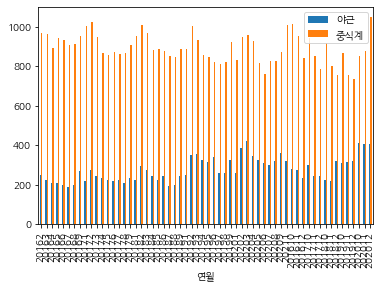

<Figure size 1080x432 with 0 Axes>

In [119]:
gr1 = df.groupby('연월')[['야근', '중식계']].mean()
gr1.plot(kind='bar')
plt.figure(figsize=(15,6))
plt.show()